In [37]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [38]:
df = pd.read_csv(r"parkir-gabungan.csv", usecols=['Vehicle Type', 'Parking Slip Type','Total Income', 'Entry Information Date & Time','Exit Information Date & Time' ])

df['Exit_date'] = pd.to_datetime(df['Exit Information Date & Time'])
df['Entry_date'] = pd.to_datetime(df['Entry Information Date & Time'])

df['Duration'] = df['Exit_date'] - df['Entry_date']
df['Duration'] = df['Duration'].apply(lambda x: x.total_seconds() / 3600)



In [39]:
df['Exit_date'] = df['Exit_date'].dt.date
df['Entry_date'] =df['Entry_date'].dt.date
# Income untuk non-member
df = df[df['Parking Slip Type'] != 'MEMBER']
df = df.drop(['Entry Information Date & Time','Exit Information Date & Time'], axis=1)
df.reset_index(drop=True,inplace=True)
df.head()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration
0,MOTOR,CASUAL,28000,2023-03-01,2023-02-28,13.450000
1,MOTOR,CASUAL,36000,2023-03-01,2023-02-28,17.450000
2,MOTOR,CASUAL,36000,2023-03-01,2023-02-28,17.583333
3,MOTOR,CASUAL,8000,2023-03-01,2023-03-01,3.283333
4,MOBIL,CASUAL,53000,2023-03-01,2023-03-01,12.700000


In [40]:
df.sort_values(by='Exit_date', inplace=True)
df.head()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration
9742,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.016667
9743,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.050000
9744,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.016667
9745,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.000000
9751,MOTOR,CASUAL,2000,2022-10-10,2022-10-10,0.033333


In [41]:
df.tail()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration
20962,MOBIL,CASUAL,9000,2023-09-13,2023-09-13,1.683333
20961,MOBIL,CASUAL,5000,2023-09-13,2023-09-13,0.983333
20960,MOTOR,CASUAL,4000,2023-09-13,2023-09-13,1.250000
20957,MOBIL,CASUAL,5000,2023-09-13,2023-09-13,0.266667
21025,MOTOR,CASUAL,2000,2023-09-13,2023-09-13,0.250000


In [54]:
df_test = df.sample(frac=0.2, random_state=42)
df_train = df.drop(df_test.index)


df_train.sort_values(by='Exit_date', inplace=True)
df_test.sort_values(by='Exit_date', inplace=True)

df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)



In [55]:
df_train.head()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration
0,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.016667
1,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.050000
2,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.016667
3,MOTOR,CASUAL,1,2022-10-09,2022-10-09,0.000000
4,MOBIL,CASUAL,0,2022-10-10,2022-10-10,0.033333


In [56]:
df_test.head()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration
0,MOTOR,CASUAL,2000,2022-10-10,2022-10-10,0.033333
1,MOTOR,CASUAL,2000,2022-10-10,2022-10-10,0.000000
2,MOTOR,CASUAL,0,2022-10-12,2022-10-12,6.250000
3,MOBIL,CASUAL,0,2022-10-12,2022-10-12,0.700000
4,MOTOR,CASUAL,0,2022-10-12,2022-10-12,8.033333


In [57]:
df_train.tail()

,Vehicle Type,Parking Slip Type,Total Income,Exit_date,Entry_date,Duration
43443,MOBIL,CASUAL,5000,2023-09-13,2023-09-13,0.183333
43444,MOBIL,CASUAL,5000,2023-09-13,2023-09-13,0.066667
43445,MOBIL,CASUAL,5000,2023-09-13,2023-09-13,0.850000
43446,MOBIL,CASUAL,9000,2023-09-13,2023-09-13,1.300000
43447,MOTOR,CASUAL,2000,2023-09-13,2023-09-13,0.250000


# ==================

In [82]:
test_day = df_test.groupby('Exit_date')['Total Income'].sum().reset_index()
train_day = df_train.groupby('Exit_date')['Total Income'].sum().reset_index()


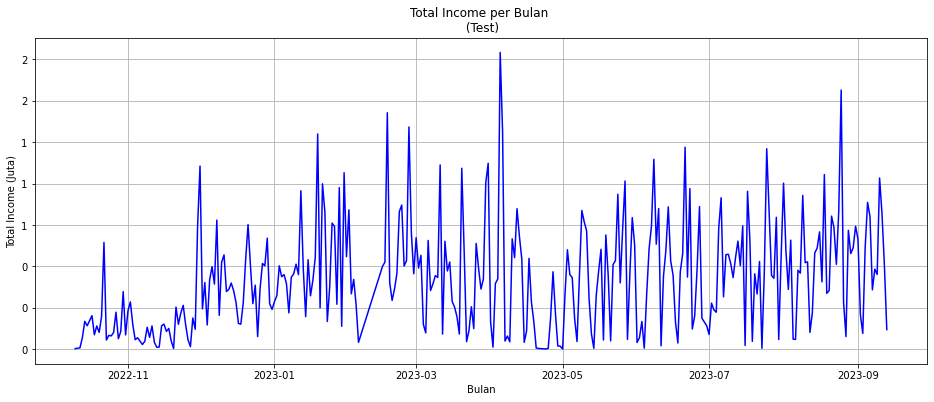

In [85]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16, 6))
plt.plot(test_day['Exit_date'],test_day['Total Income'],  linestyle='-', color='b')
plt.title('Total Income per Bulan \n (Test)')
plt.xlabel('Bulan')
plt.ylabel('Total Income (Juta)')
plt.grid(True)
# Mengubah format ylabel menjadi jutaan
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1e6)))
plt.show()

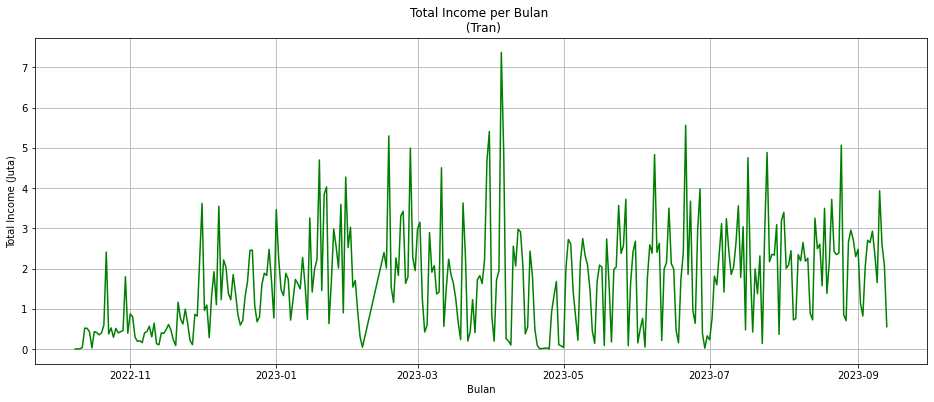

In [86]:
import matplotlib.ticker as mtick
plt.figure(figsize=(16, 6))
plt.plot(train_day['Exit_date'],train_day['Total Income'],  linestyle='-', color='g')
plt.title('Total Income per Bulan \n (Tran)')
plt.xlabel('Bulan')
plt.ylabel('Total Income (Juta)')
plt.grid(True)
# Mengubah format ylabel menjadi jutaan
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: '{:.0f}'.format(x/1e6)))
plt.show()

In [87]:
df_train.to_csv('train_data.csv', index=False)
df_test.to_csv('test_data.csv', index=False)